# Import Data Set

In [2]:
import pandas as pd
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [5]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<ipython-input-6-277cf1bf7078>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

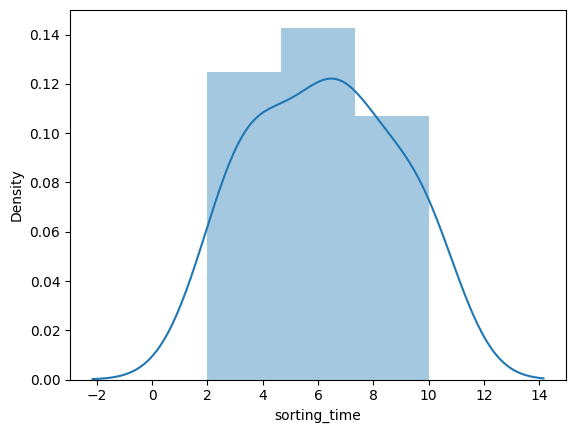

In [6]:
import seaborn as sns
sns.distplot(data['sorting_time'])

<ipython-input-7-e431a7442d63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

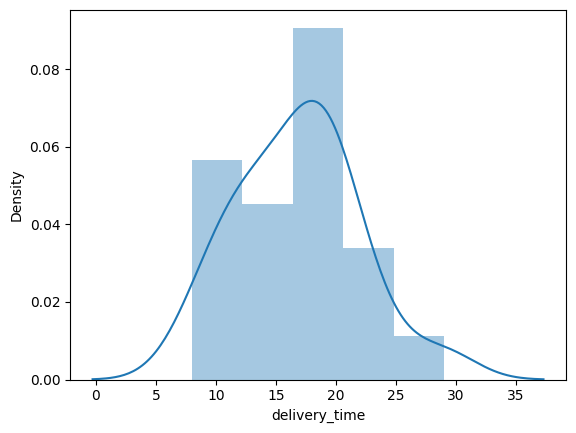

In [7]:
import seaborn as sns
sns.distplot(data['delivery_time'])

Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data).fit()

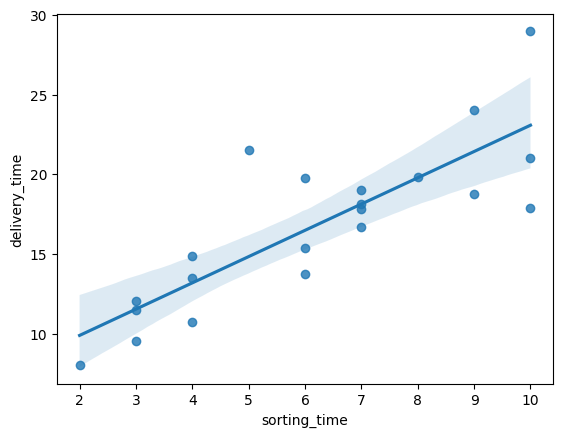

In [9]:
sns.regplot(x="sorting_time", y="delivery_time", data=data);

In [10]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [13]:
#Predict for 5 and 8 sorting time
newdata=pd.Series([5,8])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [15]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64